Instalar pacotes necessários

In [1]:
# Não é necessário instalar nenhum pacote adicional
# Todos os pacotes utilizados estão disponíveis para importação

Carrega os pacotes necessários

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import csv


In [3]:
# Tabela 1. Termos estatı́sticos selecionados para coleta de dados
termos = {
    'AM': {
        'desc': 'Amostra',
        'regex': 'amostra'
    },
    'DP': {
        'desc': 'Desvio Padrão',
        'regex': 'desvio padrão'
    },
    # Unificada conforme artigo do Alessander
    'DN': {
        'desc': 'Distribuição Normal ou Gaussiana',
        'regex': 'distribuição normal|gaussiana'
    },
    # Removida conforme artigo do Alessander - relacionada a clock
    #'FR': {
    #    'desc': 'Frequência',
    #    'regex': 'frequência'
    #},
    'IC': {
        'desc': 'Intervalo de Confiança',
        'regex': 'intervalo de confiança'
    },
    'ME': {
        'desc': 'Média',
        'regex': 'média'
    },
    'NE': {
        'desc': 'Num. Execuções',
        'regex': 'número de execuções'
    },
    'NI': {
        'desc': 'Num. Iterações',
        'regex': 'numero de iterações'
    },
    'TE': {
        'desc': 'Teste/Experimento',
        'regex': 'teste|experimento|simulação'
    },
    'VR': {
        'desc': 'Variância',
        'regex': 'variância'
    }
}

In [4]:
pd.DataFrame(
  list(map(lambda key,value: (f"{value['desc']} ({key})",f"{value['regex'].lower().replace('|',' OR ')}"), termos.keys(), termos.values())),
  columns=['Descrição', 'Chave de Pesquisa']
).style\
.hide_index()\
.set_table_attributes("style='display:inline'")\
.set_caption('Tabela 1. Termos estatı́sticos selecionados para coleta de dados')

Descrição,Chave de Pesquisa
Amostra (AM),amostra
Desvio Padrão (DP),desvio padrão
Distribuição Normal ou Gaussiana (DN),distribuição normal OR gaussiana
Intervalo de Confiança (IC),intervalo de confiança
Média (ME),média
Num. Execuções (NE),número de execuções
Num. Iterações (NI),numero de iterações
Teste/Experimento (TE),teste OR experimento OR simulação
Variância (VR),variância


In [5]:
# Tabela 2. Métricas selecionadas para coleta de dados
metricas = {
    'BW': {
        'desc': 'Bandwidth',
        'regex': 'bandwidth|largura de banda'
    },
    'BP': {
        'desc': 'BPS',
        'regex': 'bits por segundo|bps'
    },
    'CN': {
        'desc': 'Capacidade Nominal',
        'regex': 'nominal capacity|capacidade nominal'
    },
    'CU': {
        'desc': 'Capacidade Utilizável',
        'regex': 'usable capacity|capacidade utilizável'
    },
    'CO': {
        'desc': 'Confiabilidade',
        'regex': 'Reliability|Confiabilidade'
    },
    'CP': {
        'desc': 'Cost/Perfornace Ratio',
        'regex': 'cost ratio|performance ratio'
    },
    'DI': {
        'desc': 'Disponibilidade',
        'regex': 'availability|disponibilidade'
    },
    'DU': {
        'desc': 'Downtime/Uptime',
        'regex': 'downtime|uptime'
    },
    'EA': {
        'desc': 'Eficiência/Acurácia',
        'regex': 'eficiência|eficácia|accuracy'
    },
    'FE': {
        'desc': 'Fator de Estiramento',
        'regex': 'strech factor|fator de estiramento'
    },
    'TO': {
        'desc': 'Tempo Ocioso',
        'regex': 'Idle time|tempo ocisoso'
    },
    'MF': {
        'desc': 'MFLOPS',
        'regex': 'MFLOPS'
    },
    'MI': {
        'desc': 'MIPS',
        'regex': 'MIPS'
    },
    'MT': {
        'desc': 'MTTF',
        'regex': 'MTTF'
    },
    'PP': {
        'desc': 'PPS',
        'regex': 'PPS'
    },
    'SU': {
        'desc': 'Speed up',
        'regex': r'speed?up'
    },
    'TR': {
        'desc': 'Tempo de Reação',
        'regex': 'reaction time|tempo de reação'
    },
    'TP': {
        'desc': 'TPS',
        'regex': 'TPS'
    }
}


In [6]:
pd.DataFrame(
  list(map(lambda key,value: (f"{value['desc']} ({key})",f"{value['regex'].lower().replace('|',' OR ')}"), metricas.keys(), metricas.values())),
  columns=['Descrição', 'Chave de Pesquisa']
).style\
.hide_index()\
.set_table_attributes("style='display:inline'")\
.set_caption('Tabela 2. Métricas selecionadas para coleta de dados')

Descrição,Chave de Pesquisa
Bandwidth (BW),bandwidth OR largura de banda
BPS (BP),bits por segundo OR bps
Capacidade Nominal (CN),nominal capacity OR capacidade nominal
Capacidade Utilizável (CU),usable capacity OR capacidade utilizável
Confiabilidade (CO),reliability OR confiabilidade
Cost/Perfornace Ratio (CP),cost ratio OR performance ratio
Disponibilidade (DI),availability OR disponibilidade
Downtime/Uptime (DU),downtime OR uptime
Eficiência/Acurácia (EA),eficiência OR eficácia OR accuracy
Fator de Estiramento (FE),strech factor OR fator de estiramento


In [7]:
# Tabela 3. Testes estatı́sticos selecionados para coleta de dados
testes = {
    'PV': {
        'desc': 'P-Valor',
        'regex': 'p-valor|p-value|valor p'
    },
    'AN': {
        'desc': 'Teste ANOVA',
        'regex': 'anova'
    },
    'CH': {
        'desc': 'Teste Chi-quadrado',
        'regex': 'chi-quadrado|qui-quadrado'
    },
    'TC': {
        'desc': 'Teste de Wilcoxon',
        'regex': 'wilcoxon signed-rank'
    },
    'FI': {
        'desc': 'Teste Exato de Fisher',
        'regex': 'teste exato de fisher|fisher'
    },
    'KR': {
        'desc': 'Teste Kruskal-Wallis',
        'regex': 'kruskal-wallis'
    },
    'TT': {
        'desc': 'Teste T',
        'regex': 'teste de student|t-student|t de student|student|teste[ -]?t'
    },
    'TU': {
        'desc': 'Teste U',
        'regex': 'teste U|mann-whitney|wilcoxon rank-sum'
    }
}

In [8]:
pd.DataFrame(
  list(map(lambda key,value: (f"{value['desc']} ({key})",f"{value['regex'].lower().replace('|',' OR ')}"), testes.keys(), testes.values())),
  columns=['Descrição', 'Chave de Pesquisa']
).style\
.hide_index()\
.set_table_attributes("style='display:inline'")\
.set_caption('Tabela 3. Testes estatı́sticos selecionados para coleta de dados')

Descrição,Chave de Pesquisa
P-Valor (PV),p-valor OR p-value OR valor p
Teste ANOVA (AN),anova
Teste Chi-quadrado (CH),chi-quadrado OR qui-quadrado
Teste de Wilcoxon (TC),wilcoxon signed-rank
Teste Exato de Fisher (FI),teste exato de fisher OR fisher
Teste Kruskal-Wallis (KR),kruskal-wallis
Teste T (TT),teste de student OR t-student OR t de student OR student OR teste[ -]?t
Teste U (TU),teste u OR mann-whitney OR wilcoxon rank-sum


In [9]:
# Abreviações para montar as tabelas
abreviacoes = {
  'média': 'ME',
  'número de iteraçoes': 'NI',
  'teste ou experimento': 'TE',
  'eficiência ou acurácia': 'EA',
  'speedup': 'SU',
  'Cost ou Perfornace Ratio': 'CP',
  'Disponibilidade': 'DI',
  'desvio padrão': 'DP',
  'confiabilidade': 'CO',
  'intervalo de confiança': 'IC',
  'amostra': 'AM',
  'mips': 'MI',
  'Bandwidth': 'BW',
  'Teste T': 'TT',
  'Teste Kruskal-Wallis': 'KR',
  'Distribuição Normal': 'DN',
  'variancia': 'VR',
  'p-valor': 'PV',
  'Teste de Wilcoxon': 'TC',
  'bps': 'BP',
  'MFLOPS': 'MF',
}
# Legendas
legendas = dict(map(lambda key,value: (value,key), abreviacoes.keys(), abreviacoes.values()))
legendas = {**legendas, **{
  'n': 'Total de artigos selecionados',
  'art.': 'Artigos citando os termos de busca',
  'cit.': 'Citações aos termos de busca'
}}

# Artigos completos em português em cada ano do WSCAD
artigos_por_ano = {
    2018: 19,
    2019: 23,
    2020: 16,
    2021: 12
}

Monta o diretório contendo os dados

In [10]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
# Dados
# https://drive.google.com/drive/folders/1xuhyutPMXuP4Igy2Vd2BP6u6GkSQWK8_?usp=sharing
dados_path = "/content/drive/.shortcut-targets-by-id/1xuhyutPMXuP4Igy2Vd2BP6u6GkSQWK8_/Dados"
os.chdir(dados_path)

Mounted at /content/drive


In [11]:
resultados_path = os.path.join(dados_path, 'resultados', 'csv-manual')
print(f"Diretório de resultados: {resultados_path}")
if not os.path.exists(resultados_path):
  os.mkdir(resultados_path)

Diretório de resultados: /content/drive/.shortcut-targets-by-id/1xuhyutPMXuP4Igy2Vd2BP6u6GkSQWK8_/Dados/resultados/csv-manual


Carrega arquivo CSV

In [12]:
import requests
from io import StringIO

# Header: evento;ano;artigo;ocorrencias;termo;tipo;;Total;tipo;artigo
def carrega_csv_extracao_manual(url):
  csv_str = requests.get(url).content.decode('iso8859-1')
  return pd.read_csv(
      StringIO(csv_str),
      sep=';',
      usecols=[0,1,2,3,4,5] # evento;ano;artigo;ocorrencias;termo;tipo-termo
  );

url = "https://raw.githubusercontent.com/brunoluizs/ADIMS/main/resultadosRemovendoTermoFrequencia.csv"
df_extracao = carrega_csv_extracao_manual(url)

In [13]:
def transforma_df_extracao_manual(df):
  # EST, MET, TST
  termos = dict()
  metricas = dict()
  testes = dict()
  for index, row in df.iterrows():
    tipo = row[5]
    if   tipo == 'EST':
      definir_valor(termos, row)
    elif tipo == 'MET':
      definir_valor(metricas, row)
    elif tipo == 'TST':
      definir_valor(testes, row)
  return (termos,metricas,testes)

# dados[ano] = {'<termo1>': {'<artigo1>': ocorrencias1, ..., '<artigoN>': ocorrenciasN }, ..., '<termoN>': {'<artigoX>': ocorrenciasX}}
def definir_valor(dados, linha):
    #evento      = linha[0]
    ano         = linha[1]
    artigo      = linha[2]
    ocorrencias = linha[3]
    termo       = linha[4]
    #tipo        = linha[5]
    abreviacao  = abreviacoes.get(termo, termo)
    if ano not in dados:
      dados[ano] = dict()
    if abreviacao not in dados[ano]:
      dados[ano][abreviacao] = dict()
    dados[ano][abreviacao].update({artigo: ocorrencias})

resultados_termos, resultados_metricas, resultados_testes = transforma_df_extracao_manual(df_extracao)

Sumariza os resultados

In [14]:
def resumir_resultados(resultados,csv_ano_basepath=None,csv_resumo_path=None):
  resumo = pd.DataFrame()
  for ano in resultados.keys():
    df_ano = pd.DataFrame(resultados[ano])
    if csv_ano_basepath is not None:
      df_ano.to_csv(
        f"{csv_ano_basepath}_{ano}.csv"
        , sep=';'
        , header=True
        , index=True
        , index_label='artigo'
        , compression=None
        , quoting=csv.QUOTE_NONNUMERIC
        , encoding='iso8859-1'
      )
    df_ano_sum = df_ano.count()
    df_ano_sum.loc['cit.'] = df_ano_sum.sum()
    df_ano_sum.loc['art.'] = df_ano.shape[0]
    df_ano_sum.loc['n'] = artigos_por_ano.get(ano)
    df_ano = pd.DataFrame()
    df_ano[ano] = df_ano_sum
    resumo = pd.concat([resumo, df_ano.transpose()])
  for ano in artigos_por_ano.keys():
    if ano not in resumo.index:
      df_ano = pd.DataFrame(np.nan, index=[ano], columns=resumo.columns)
      df_ano['n'] = artigos_por_ano.get(ano)
      resumo = pd.concat([resumo, df_ano])
  if csv_resumo_path is not None:
    resumo.to_csv(
      csv_resumo_path
      , sep=';'
      , header=True
      , index=True
      , index_label='ano'
      , compression=None
      , quoting=csv.QUOTE_NONNUMERIC
      , encoding='iso8859-1'
    )
  colunas = list(resumo.columns.values)
  colunas.remove('cit.')
  colunas.remove('art.')
  colunas.remove('n')
  return resumo[['n', 'art.', 'cit.'] + colunas]

In [15]:
resumo_termos = resumir_resultados(
    resultados_termos,
    os.path.join(resultados_path, 'termos'),
    os.path.join(resultados_path, 'termos_resumo.csv')
  )

In [16]:
resumo_metricas = resumir_resultados(
    resultados_metricas,
    os.path.join(resultados_path, 'metricas'),
    os.path.join(resultados_path, 'metricas_resumo.csv')
  )

In [17]:
resumo_testes = resumir_resultados(
    resultados_testes,
    os.path.join(resultados_path, 'testes'),
    os.path.join(resultados_path, 'testes_resumo.csv')
  )

Gerar legenda para as colunas

In [18]:
def df_html_legendado(df, titulo=None):
  css = [
       {
          'selector': f'th.col_heading.col{i}:hover:after',
          'props': [
                    ('display', 'block'),
                    ('content', f'\"{legendas.get(sigla, sigla)}\"')
          ]
       }
       for i,sigla in enumerate(df.columns)
  ]
  css.append(
      {'selector': 'th.col_heading', 'props': 'position:relative;'}
  )
  css.append(
      {'selector': 'th.col_heading:after', 'props': 'background-color:rgba(0, 0, 0, .6); color: white; box-sizing:border-box; display:none; padding:5px; position:absolute; right: -105px; bottom: -55px; z-index:3; box-shadow: 0 0 3px #fff; border-radius: 0px 10px 10px 10px;'},
  )
  return df.fillna('-').style.set_table_styles(css).set_caption(titulo)

In [19]:
df_html_legendado(resumo_termos, "Tabela 5. Citações de Termos Estatísticos de 2018 a 2021")

,n,art.,cit.,ME,NI,TE,DP,IC,AM,DN,VR
2018,19,19,45,15,2.000000,19,4,2.000000,3,-,-
2019,23,22,53,14,3.000000,22,5,-,5,2.000000,2.000000
2020,16,16,37,11,-,16,7,-,2,1.000000,-
2021,12,12,25,7,1.000000,12,2,-,3,-,-


In [20]:
df_html_legendado(resumo_metricas, "Tabela 7. Citações de Métricas de 2018 a 2021")

,n,art.,cit.,EA,SU,CP,DI,CO,MI,BW,BP,MF
2018,19,18,34,12,8,1.000000,5,3,2.000000,3,-,-
2019,23,22,38,14,14,-,4,3,-,2,1.000000,-
2020,16,13,26,8,7,-,3,4,1.000000,2,-,1.000000
2021,12,11,23,10,5,-,2,2,-,4,-,-


In [21]:
df_html_legendado(resumo_testes, "Tabela 9. Citações de Testes de 2018 a 2021")

,n,art.,cit.,TT,KR,PV,TC
2018,19,2.000000,2.000000,1.000000,1.000000,-,-
2019,23,3.000000,4.000000,2.000000,-,1.000000,1.000000
2020,16,2.000000,2.000000,2.000000,-,-,-
2021,12,-,-,-,-,-,-


Distribuição de citações por tipo do termo e ano

In [22]:
citacoes_termos = resumo_termos[['art.', 'cit.']].transpose()
citacoes_metricas = resumo_metricas[['art.', 'cit.']].transpose()
citacoes_testes = resumo_testes[['art.', 'cit.']].transpose()
citacoes = pd.concat(
    [
        citacoes_termos,
        citacoes_metricas,
        citacoes_testes,
    ],
    keys=[
        'Estatística',
        'Métricas',
        'Testes'
    ]
).transpose()
citacoes['n'] = resumo_testes[['n']]
colunas = citacoes.columns.tolist()
colunas = colunas[-1:] + colunas[:-1]

In [23]:
citacoes[colunas]\
.fillna('-')\
.style\
.set_table_attributes("style='display:inline'")\
.set_caption("Tabela 11. Distribuição de citações de 2018 a 2021 por tipo do termo e ano")

In [24]:
csv_citacoes_path = os.path.join(resultados_path, 'citacoes.csv')
citacoes[colunas].to_csv(
  csv_citacoes_path
  , sep=';'
  , header=True
  , index=True
  , index_label='Ano'
  , compression=None
  , quoting=csv.QUOTE_NONNUMERIC
  , encoding='iso8859-1'
)  

Gráficos

In [25]:
colunas_proporcao = colunas.copy()
tipos = ['Estatística','Métricas','Testes']
n_col_idx = ('n','')

for col_cit in list(map(lambda tipo: (tipo, 'cit.'), tipos)):
  colunas_proporcao.remove(col_cit)
colunas_proporcao.remove(n_col_idx)

df_grafico_proporcao = pd.DataFrame()
df_grafico_razao = pd.DataFrame()

for tipo in tipos:
  df_grafico_proporcao[tipo] = citacoes[(tipo, 'art.')] / citacoes[n_col_idx]
  df_grafico_razao[tipo] = citacoes[(tipo, 'cit.')] / citacoes[(tipo, 'art.')]


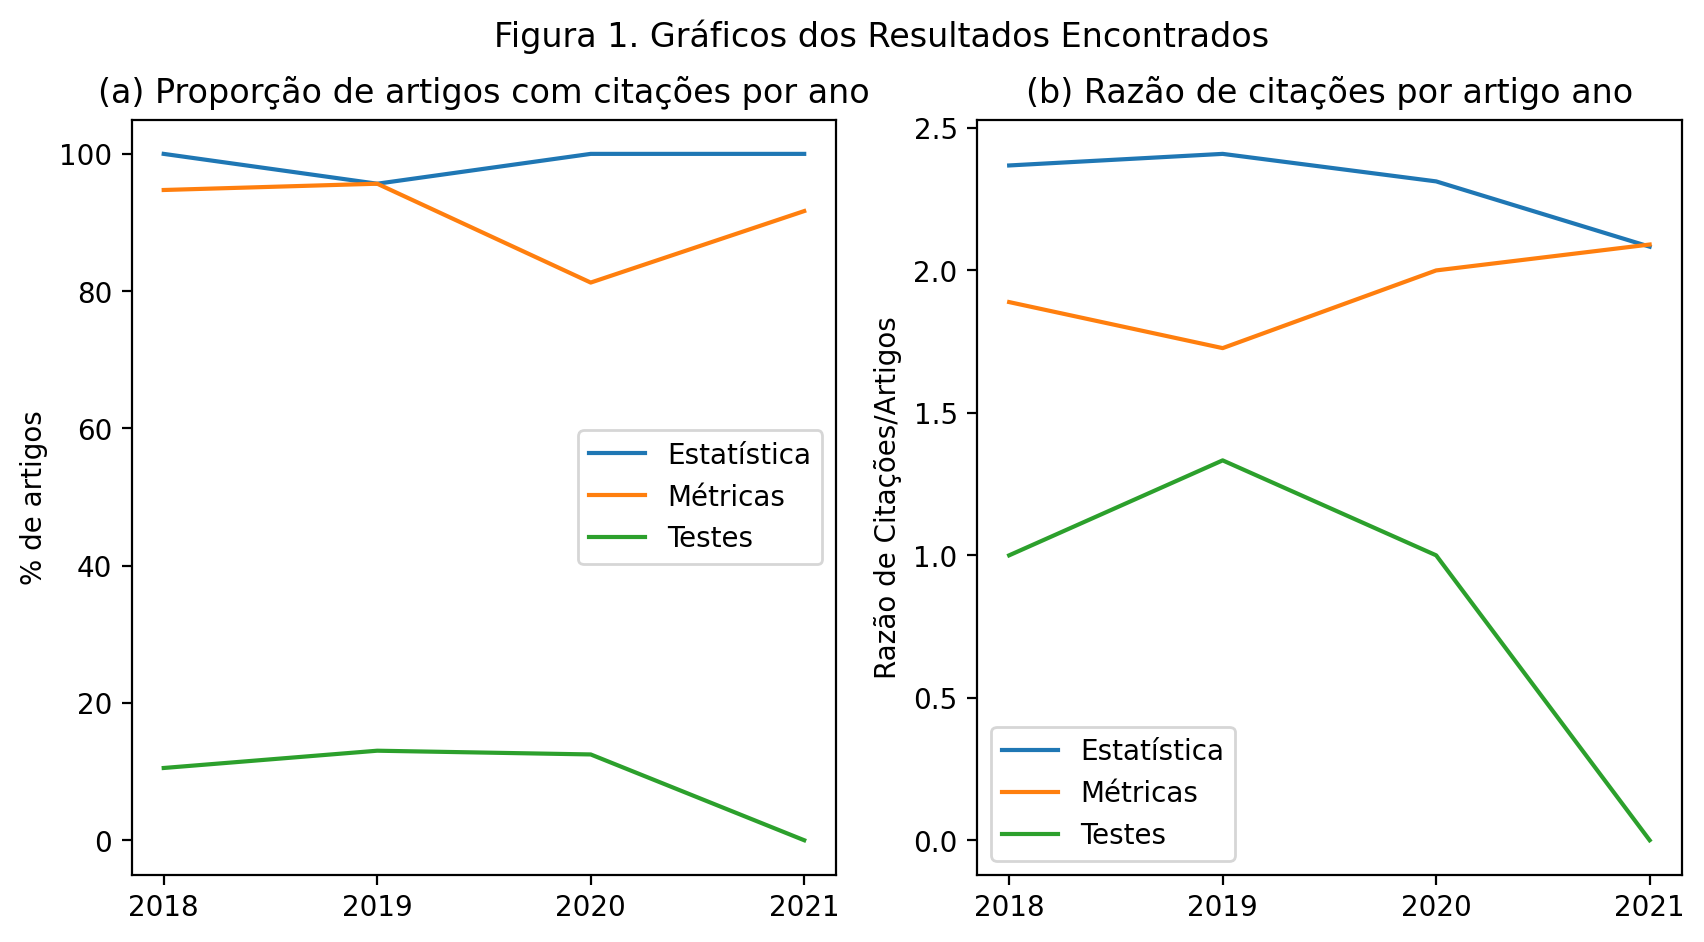

In [26]:
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.add_subplot(121)
df_grafico_proporcao.fillna(0).mul(100).plot(
  ax=ax,
  ylabel='% de artigos',
  title='(a) Proporção de artigos com citações por ano',
  xticks=df_grafico_proporcao.index,
)

ax = fig.add_subplot(122)
df_grafico_razao.fillna(0).plot(
  ax=ax,
  ylabel='Razão de Citações/Artigos',
  title='(b) Razão de citações por artigo ano',
  xticks=df_grafico_proporcao.index,
)
fig.suptitle('Figura 1. Gráficos dos Resultados Encontrados')
plt.show()

In [27]:
 # TODO: Figura 2. Score de Qualidade por Ano


ANOVA

In [28]:
# Ref: https://www.reneshbedre.com/blog/anova.html

In [29]:
# Carregar dados período 2000-2017
url = "https://raw.githubusercontent.com/alessanderosorio/SMPE-UFRGS/master/evento_tipo_ano.csv"
csv_str = requests.get(url).content.decode('iso8859-1')
df_alessander = pd.read_csv(
    StringIO(csv_str),
    sep=';',
    usecols=[0,1,2,3,4,5] # evento;tipo;ano;n_art;n_ocur;total;!n_qualis
)
df_wscad_2000_2017 = df_alessander[
  df_alessander['evento']=='WSCAD'
][['ano','total','tipo','n_art','n_ocur']]
df_wscad_2000_2017 = df_wscad_2000_2017.pivot(index=['ano','total'],columns=['tipo']).fillna(0)
#.groupby(['ano','total','tipo'], as_index=False)[['n_art','n_ocur']].head()

In [30]:
df_anova_2000_2017 = df_wscad_2000_2017[[
  ( 'n_art', 'EST'),
  ( 'n_art', 'MET'),
  ( 'n_art', 'TST')
]].droplevel(level=1, axis=1).reset_index()
df_anova_2000_2017.columns = ['ano', 'total', 'EST', 'MET', 'TST']

In [31]:
df_anova_2018_2021 = citacoes[[
  (          'n',     ''),
  ('Estatística', 'art.'),
  (   'Métricas', 'art.'),
  (     'Testes', 'art.'),
]]\
.fillna(0)\
.droplevel(level=1, axis=1).reset_index()
df_anova_2018_2021.columns = ['ano', 'total', 'EST', 'MET', 'TST']

In [32]:
df_anova = pd.concat([df_anova_2000_2017, df_anova_2018_2021])

In [33]:
df_anova['tratamento'] = np.where(df_anova['ano'] < 2019, 'antes','depois')

In [34]:
df_anova[['ano', 'total', 'MET', 'EST', 'TST', 'tratamento']]

,ano,total,MET,EST,TST,tratamento
0,2000,9,7.0,5.0,0.0,antes
1,2001,23,16.0,20.0,1.0,antes
2,2002,27,19.0,22.0,0.0,antes
3,2003,32,23.0,28.0,0.0,antes
4,2004,33,21.0,30.0,0.0,antes
5,2005,34,26.0,31.0,0.0,antes
6,2006,28,12.0,24.0,0.0,antes
7,2007,21,12.0,17.0,2.0,antes
8,2008,28,17.0,24.0,1.0,antes
9,2009,23,16.0,14.0,1.0,antes


In [35]:
# ANOVA
import scipy.stats as stats
_, pvalue = stats.f_oneway(
    df_anova[df_anova['tratamento'] == 'antes' ][['EST', 'MET', 'TST']],
    df_anova[df_anova['tratamento'] == 'depois'][['EST', 'MET', 'TST']],
)
print(list(zip(['EST', 'MET', 'TST'],pvalue)))

[('EST', 0.6711903126350541), ('MET', 0.8057252870377511), ('TST', 0.05904798621316839)]
